In [1]:
# Imports
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import pandas as pd
import os
import json

<div style="border-bottom: 3px solid black;"></div>

### Task 2 &mdash; Drug Classification

2. Load the dataset in Python (you can use pandas.read csv)

In [2]:
df = pd.read_csv("test23.csv", index_col=False)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,51,M,HIGH,HIGH,18.295,drugY
1,35,M,LOW,NORMAL,9.170,drugX
2,49,M,LOW,NORMAL,11.014,drugX
3,72,M,LOW,HIGH,6.769,drugC
4,50,M,NORMAL,NORMAL,15.790,drugY
5,47,M,LOW,NORMAL,30.568,drugY
6,74,M,LOW,NORMAL,11.939,drugX
7,48,M,HIGH,NORMAL,10.446,drugA
8,56,M,NORMAL,HIGH,8.966,drugX
9,61,F,LOW,NORMAL,7.340,drugX


3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf.
You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced,
and which metric is more appropriate to use to evaluate the performance of your classifier.

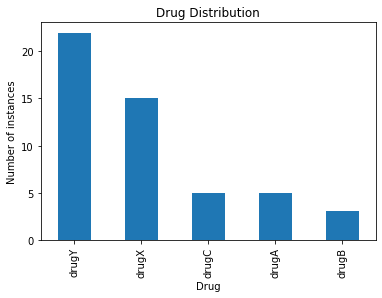

In [3]:
num_drugs_per_class = df.Drug.value_counts().to_frame()
drug_distribution = num_drugs_per_class.plot(kind="bar", title='Drug Distribution', legend=False)
drug_distribution.set_xlabel("Drug")
drug_distribution.set_ylabel("Number of instances")
plt.show()
drug_distribution.figure.savefig("test23-demo-distribution.pdf")

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format
respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You
may want to take a look at pandas.get dummies and pandas.Categorical to do this.

In [4]:
ordinals = ['LOW', 'NORMAL', 'HIGH']
y = df.pop("Drug")
df.BP = pd.Categorical(df.BP, categories=ordinals, ordered=True).codes
df.Cholesterol= pd.Categorical(df.Cholesterol, categories=ordinals, ordered=True).codes
df = pd.get_dummies(df)

5. Split the dataset using train test split using the default parameter values.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df, y)

6. Run 6 different classifiers:

In [6]:
#a
gaussianNB = GaussianNB()
gaussianNB.fit(x_train, y_train)
gaussianNB_predictions = gaussianNB.predict(x_test)

#b
base_DT = DecisionTreeClassifier()
base_DT.fit(x_train,y_train)
base_DT_predictions = base_DT.predict(x_test)

#c
top_DT = DecisionTreeClassifier()
parameters = {'criterion':('gini', 'entropy'), 'max_depth':(4,8), 'min_samples_split':(2,3,4)}
top_DT_grid = GridSearchCV(top_DT, parameters)
top_DT_grid.fit(x_train,y_train)
top_DT_grid_predict = top_DT_grid.predict(x_test)

#d
perceptron = Perceptron()
perceptron.fit(x_train,y_train)
perceptron_predict = perceptron.predict(x_test)

#e
base_MLP = MLPClassifier(hidden_layer_sizes=(100),activation='logistic', solver='sgd')
base_MLP.fit(x_train,y_train)
base_MLP_predict = base_MLP.predict(x_test)

#f
top_MLP = MLPClassifier()
parameters = {'activation':('logistic', 'tanh', 'relu','identity'), 'hidden_layer_sizes':((30,50),(10,10,10)), 'solver':('adam','sgd')}
top_MLP_grid = GridSearchCV(top_MLP,parameters)
top_MLP_grid.fit(x_train,y_train)
top_MLP_grid_predict = top_MLP_grid.predict(x_test)

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

7. For each of the 6 classifier above, append the following information in a file called drug-performance.txt:
(to make it easier for the TAs, make sure that your output for each sub-question below is clearly marked
in your output file, using the headings (a), (b) . . . )

In [7]:
def writeResults(file, y_test, y_pred):
    file.write(f"\nAccuracy of model: {accuracy_score(y_test, y_pred)}\n")
    file.write(f"Macro-average F1: {f1_score(y_test, y_pred, average='macro')}\n")
    file.write(f"Weighted-average F1: {f1_score(y_test, y_pred, average='weighted')}\n\n")

def createHeader(file, model_name):
    file.write("**********************************************\n")
    file.write(f"*****{model_name}******\n")
    file.write("**********************************************\n\n")

def writeModelPeformance(file, model_name, y_pred, y_test = y_test, isGrid = False, grid_model = None):
    #a)
    createHeader(file, model_name)
    if isGrid:
        file.write(f"\nBest parameters: {json.dumps(grid_model.best_params_)}\n")
    #b)
    file.write("\n\nb)\n\n")
    cm = confusion_matrix(y_test, y_pred)
    file.write(str(cm))
    file.write("\n\n")
    #c
    file.write("c)\n\n")
    file.write(classification_report(y_test, y_pred))
    #d
    file.write("\nd)")
    writeResults(file, y_test, y_pred)


In [8]:
try:
    os.remove("test23-demo-performance.txt")
except OSError:
    pass

with open("test23-demo-performance.txt", "a") as file:
    writeModelPeformance(file, "GaussianNB", gaussianNB_predictions)

    writeModelPeformance(file, "Base DT", base_DT_predictions)

    writeModelPeformance(file, "Top DT", top_DT_grid_predict, isGrid=True, grid_model=top_DT_grid)

    writeModelPeformance(file, "Perceptron", perceptron_predict)

    writeModelPeformance(file, "Base MLP", base_MLP_predict)

    writeModelPeformance(file, "Top MLP", top_MLP_grid_predict, isGrid=True, grid_model=top_MLP_grid)

    file.write("********************************************************************************************************************\n")
    file.write("********************************************************************************************************************\n")


C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hock

8. Redo steps 6, 10 times for each model and append the average accuracy, average macro-average F1, av-
erage weighted-average F1 as well as the standard deviation for the accuracy, the standard deviation
of the macro-average F1, and the standard deviation of the weighted-average F1 at the end of the file
drug-performance.txt. Does the same model give you the same performance every time? Explain in a
plain text file called drugs-discussion.txt. A 1 or 2 paragraph discussion is expected.

In [9]:
def writeResults(file, accuracy_array, macro_avg_f1_array, weighted_avg_f1_array):
    file.write(f"\nAverage Accuracy of model: {round(sum(accuracy_array)/10,10)}\n")
    file.write(f"Average Macro-average F1: {round(sum(macro_avg_f1_array)/10,10)}\n")
    file.write(f"Average Weighted-average F1: {round(sum(weighted_avg_f1_array)/10,10)}\n\n")

    file.write(f"\nStandard Deviation of Accuracy of model: {np.std(accuracy_array)}\n")
    file.write(f"Standard Deviation of Macro-average F1: {np.std(macro_avg_f1_array)}\n")
    file.write(f"Standard Deviation Weighted-average F1: {np.std(weighted_avg_f1_array)}\n\n")

def createHeader(file, model_name):
    file.write("**********************************************\n")
    file.write(f"*****{model_name}******\n")
    file.write("**********************************************\n\n")


def writeModelPeformance10x(file, model_name, model):
    accuracy_array =[0]*10
    macro_avg_f1_array = [0]*10
    weighted_avg_f1_array = [0]*10

    createHeader(file, model_name)

    for i in range(10):
        model.fit(x_train, y_train)
        model_predictions = model.predict(x_test)

        accuracy_array[i] = accuracy_score(y_test, model_predictions)
        macro_avg_f1_array[i] = f1_score(y_test, model_predictions, average='macro')
        weighted_avg_f1_array[i] = f1_score(y_test, model_predictions, average='weighted')


    writeResults(file, accuracy_array, macro_avg_f1_array, weighted_avg_f1_array)

        



In [10]:
with open("test23-demo-performance.txt", "a") as file:

    writeModelPeformance10x(file, "GaussianNB", gaussianNB)

    writeModelPeformance10x(file, "Base DT", base_DT)

    writeModelPeformance10x(file, "Top DT", top_DT_grid)

    writeModelPeformance10x(file, "Perceptron", perceptron)

    writeModelPeformance10x(file, "Base MLP", base_MLP)

    writeModelPeformance10x(file, "Top MLP", top_MLP_grid)

    file.write("********************************************************************************************************************\n")
    file.write("********************************************************************************************************************\n")

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hocke\miniconda3\envs\comp472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op